<a href="https://colab.research.google.com/github/SumeetsRoorkee/ML_Code/blob/main/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
! pip install tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm
from textblob import TextBlob
import time
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
tqdm.pandas()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WineQT_2.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [133]:
df = df.set_index('Id')


In [134]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [135]:
df.quality.value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


In [136]:
df.shape

(1143, 12)

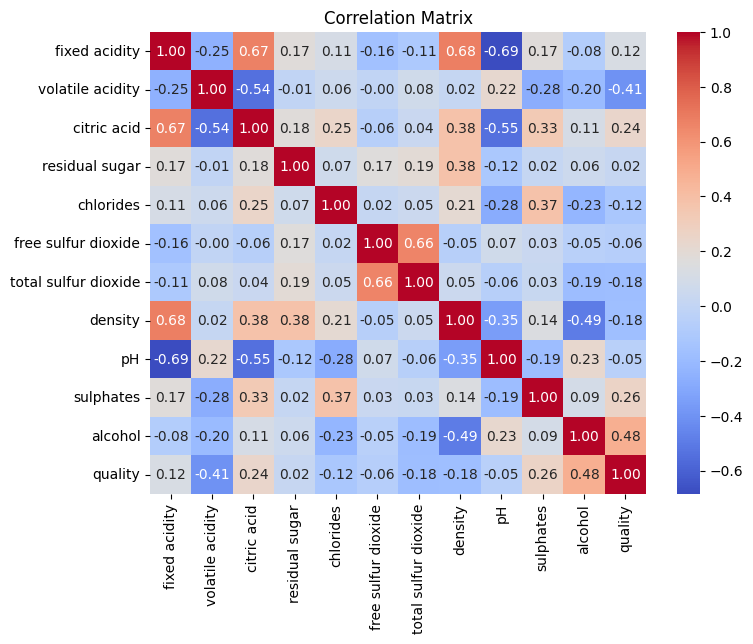

In [137]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6)) # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [138]:
nan_counts = df.isna().sum()
print(nan_counts)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [100]:
total_nan_count = df.isnull().sum().sum()
print("\nTotal NaN count:", total_nan_count)


Total NaN count: 0


In [139]:
# Create Classification version of target variable
df['vine_quality'] = [1 if x >= 7 else 0 for x in df['quality']]
X = df.drop(['quality','vine_quality'], axis = 1)
y = df['vine_quality']

In [101]:
X = df.drop('quality', axis=1)
y = df['quality']

In [178]:
# import module
from sklearn.preprocessing import StandardScaler


# compute required values
scaler = StandardScaler()
model = scaler.fit(X)
scaled_data = model.transform(X)

# print scaled data
print(scaled_data)

[[-0.52157961  0.93933222 -1.36502663 ...  1.27069495 -0.57365783
  -0.96338181]
 [-0.29259344  1.94181282 -1.36502663 ... -0.70892755  0.1308811
  -0.59360107]
 [-0.29259344  1.27349242 -1.16156762 ... -0.32577481 -0.04525363
  -0.59360107]
 ...
 [-1.20853813  0.38239855 -0.9581086  ...  0.88754221 -0.45623467
   0.05351522]
 [-1.38027776  0.10393172 -0.8563791  ...  1.33455374  0.60057372
   0.70063152]
 [-1.38027776  0.6330187  -0.75464959 ...  1.65384769  0.30701583
  -0.22382033]]


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [180]:
model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [181]:
# X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

#model = Sequential()
# Input shape for the first LSTM layer should now be (timesteps, features)
# where timesteps is 1 in this case.
#model.add(Dense(100, input_shape=(X_train.shape[1],)))
# The subsequent LSTM layers should also handle the sequence.
# Since the first LSTM returns sequences, the next LSTM layers should also expect sequences.
# The number of units can be adjusted.
#model.add(LSTM(64, return_sequences=True))
#model.add(LSTM(32)) # The last LSTM can return just the last output of the sequence if not followed by another LSTM returning sequences
#model.add(Dense(1,activation='sigmoid'))
#model.compile(optimizer='adam',
#             loss='binary_crossentropy',
#              metrics=['accuracy'])

# Train the model with the reshaped data
history = model.fit(
    X_train, y_train,
    # Use the original X_test data, not the reshaped version
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=10,
    verbose=1
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.2192 - loss: 3.0197 - val_accuracy: 0.8384 - val_loss: 0.5540
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8520 - loss: 0.5927 - val_accuracy: 0.8603 - val_loss: 0.8170
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8587 - loss: 0.8188 - val_accuracy: 0.8603 - val_loss: 0.8174
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8620 - loss: 0.7685 - val_accuracy: 0.8603 - val_loss: 0.7115
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8625 - loss: 0.6409 - val_accuracy: 0.8603 - val_loss: 0.5902
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8539 - loss: 0.5837 - val_accuracy: 0.8603 - val_loss: 0.4909
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8727 - loss: 0.4418 - val_accuracy: 0.8603 - val_loss: 0.4525
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8665 - loss: 0.4412 - val_accuracy: 0.8603 - val_loss: 0.4589


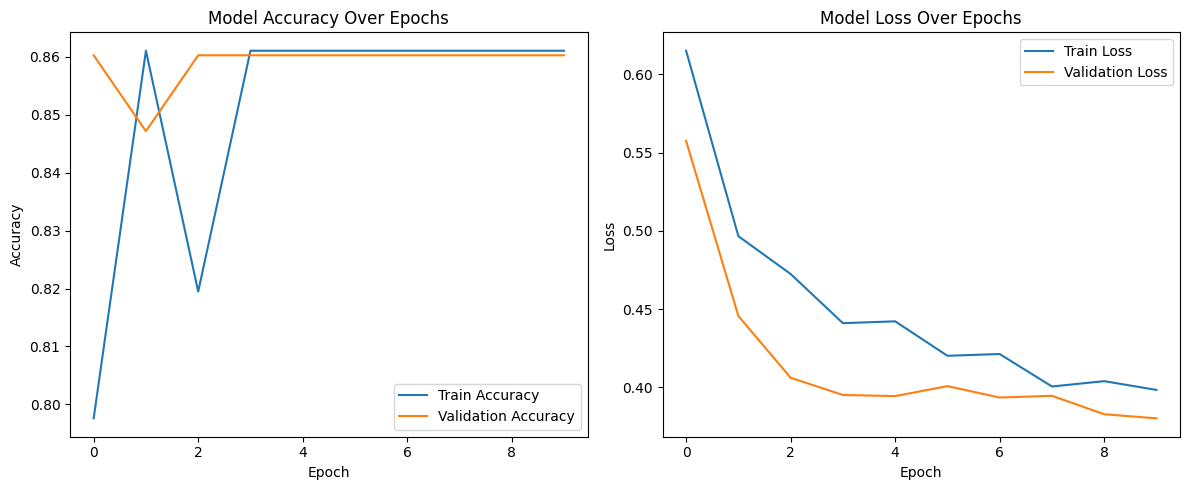

In [175]:
# Plot Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
import numpy as np
from collections import Counter

In [143]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [144]:
test_point = [4,5]
k = 3

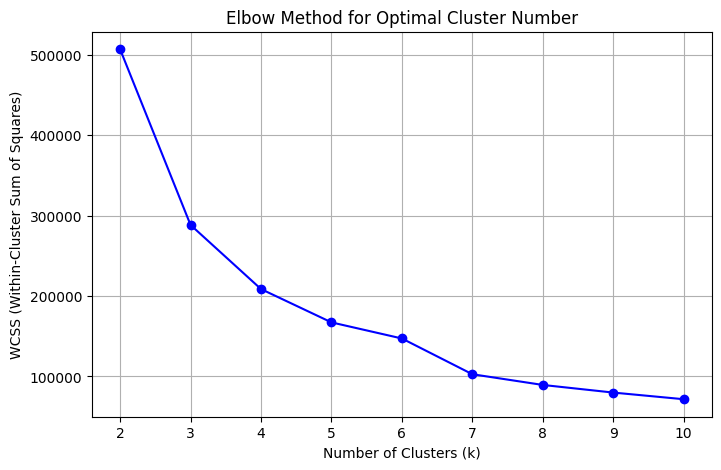

In [145]:
from sklearn.cluster import KMeans
wcss = []

K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph to determine the optimal number of clusters
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal Cluster Number")
plt.grid(True)
plt.show()

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [184]:
predictions = model.predict(X_test)

In [149]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=42)
param_grid_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_clf = GridSearchCV(clf, param_grid_clf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_clf.fit(X_train, y_train)

best_clf = grid_search_clf.best_estimator_
y_pred_clf = best_clf.predict(X_test)

print("Best Params:", grid_search_clf.best_params_)

print("Classification Report:\n", classification_report(y_test, y_pred_clf))


Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       197
           1       0.74      0.62      0.68        32

    accuracy                           0.92       229
   macro avg       0.84      0.79      0.82       229
weighted avg       0.91      0.92      0.91       229



In [185]:
model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [186]:
accuracy = (predictions == y_test).sum() / len(y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9213973799126638


In [187]:
from sklearn.svm import SVC

In [188]:
model = SVC(kernel='rbf', C=1.0, gamma=0.1)
model.fit(X_train, y_train)

SVC(gamma=0.1)

In [189]:
predictions = model.predict(X_test)

In [190]:
accuracy = (predictions == y_test).sum() / len(y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8820960698689956


In [191]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R²:", r2)

Test MSE: 0.11790393013100436
Test R²: 0.019194162436548146


In [192]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [193]:
y_pred = model.predict(X_test)

In [194]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.868995633187773
